# Results on the 100K movilens datasets

In [20]:
from alternating_least_square import AlternatingLeastSquare

# create object and get the data

In [21]:
data_dir = '../data/ml-latest-small/ratings.csv'
als_100k_data = AlternatingLeastSquare(data_dir, embedding_dim=80)

In [22]:
als_100k_data.data_indexing()

## Plotting

### Power law

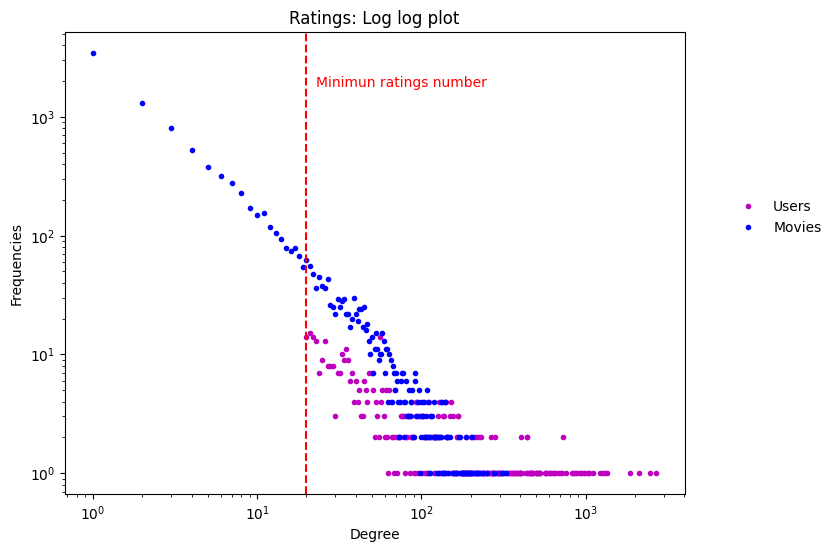

In [23]:
als_100k_data.plot_power_law()

### Ratings distribution

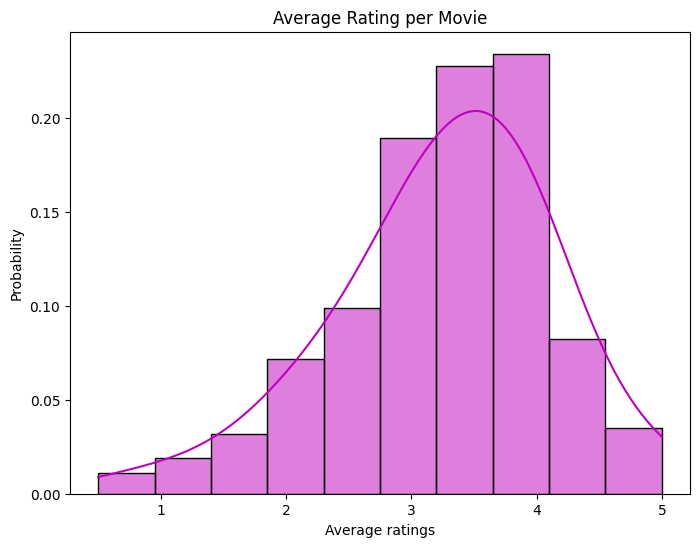

In [24]:
als_100k_data.plot_average_rating_hist()

## Train test split

In [25]:
als_100k_data.train_test_split()

## Run the model: biases + embeddings

In [26]:

user_biases, item_biases ,losses, rmse, losses_test, rmses_test= als_100k_data.alternating_least_square(als_100k_data.data_by_user_train, als_100k_data.data_by_movie_train, lambd=0.1, gamma=0.001, epochs = 100)

Training: 100%|██████████| 100/100 [03:07<00:00,  1.87s/epoch, test_rmse=0.967]


## Plot losses on training and test sets

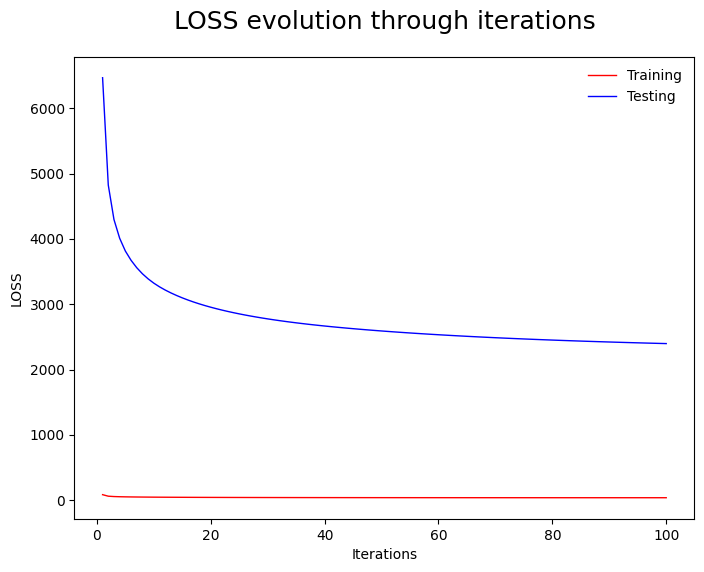

In [27]:
als_100k_data.line_plot(losses, losses_test, xaxis = "Iterations", yaxis = "LOSS", title="LOSS evolution through iterations")


## Plot RMSEs on training and test sets

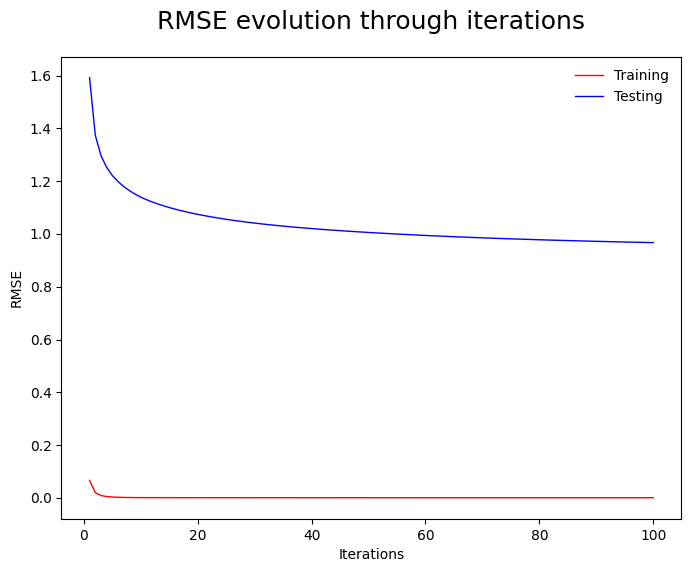

In [28]:
als_100k_data.line_plot(rmse, rmses_test, xaxis = "Iterations", yaxis = "RMSE", title="RMSE evolution through iterations")


## Items scores

In [29]:
items_scores = als_100k_data.compute_items_score()

In [31]:
items_scores

array([[-0.29349482,  0.53976574, -0.29293386, ..., -0.23409225,
         0.        , -0.06791634],
       [ 0.51878301, -0.08800361,  0.14158062, ..., -0.25235457,
         0.        , -0.07350322],
       [ 0.32882231, -1.03829791, -0.08340061, ..., -0.46995476,
         0.        , -0.14007232],
       ...,
       [-0.63553913, -1.13502979,  0.11222113, ..., -0.13627063,
         0.        , -0.03799037],
       [-0.05439849, -0.1702028 ,  0.37163732, ..., -0.22867289,
         0.        , -0.06625843],
       [ 1.28556139,  0.20048474, -0.15659022, ..., -0.71450981,
         0.        , -0.21488755]])

In [11]:
import numpy as np
a=np.linspace(0,13, num = 12).reshape(3,4)


In [12]:
a

array([[ 0.        ,  1.18181818,  2.36363636,  3.54545455],
       [ 4.72727273,  5.90909091,  7.09090909,  8.27272727],
       [ 9.45454545, 10.63636364, 11.81818182, 13.        ]])

In [13]:
b=np.array([1,2,3,3])

In [14]:
a+b

array([[ 1.        ,  3.18181818,  5.36363636,  6.54545455],
       [ 5.72727273,  7.90909091, 10.09090909, 11.27272727],
       [10.45454545, 12.63636364, 14.81818182, 16.        ]])

# Results on the 25K movilens datasets

# create object and get the data

In [15]:

data_dir = '../data/ml-25m/ratings.csv'
als_25m_data = AlternatingLeastSquare(data_dir, embedding_dim=5)
als_25m_data.data_indexing()


KeyboardInterrupt



## Plots

### Power law

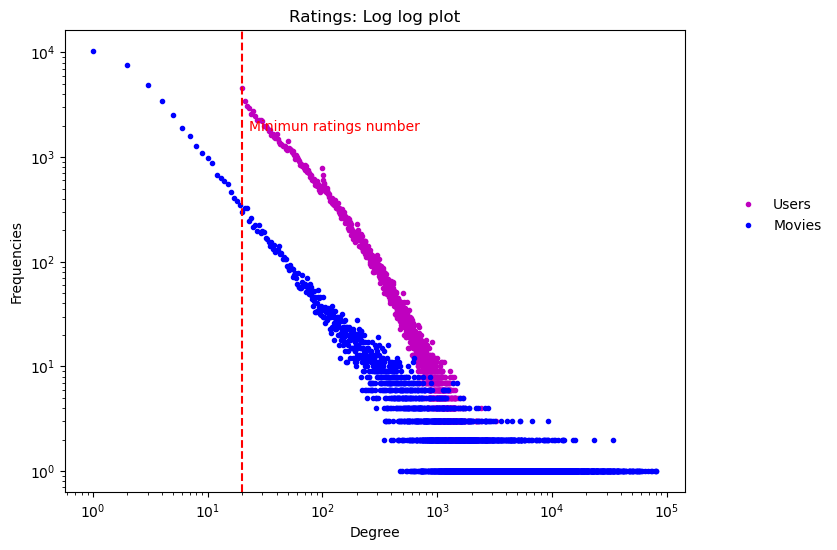

In [3]:
als_25m_data.plot_power_law()

### Ratings distribution

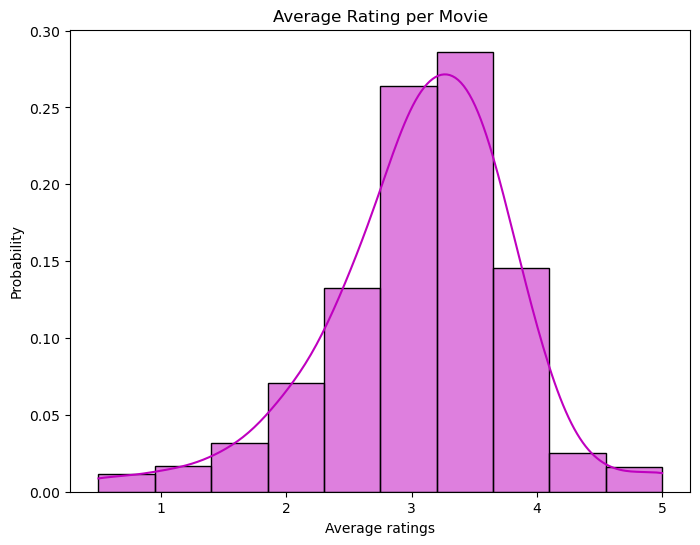

In [4]:

als_25m_data.plot_average_rating_hist()

## Train test split

In [8]:

als_25m_data.train_test_split()

## Run the model: biases + embeddings

In [14]:
user_biases, item_biases ,losses, rmse, losses_test, rmses_test= als_25m_data.alternating_least_square(als_25m_data.data_by_user_train, als_25m_data.data_by_movie_train, lambd=0.1, gamma=0.001, epochs = 20)

Training: 100%|██████████| 20/20 [45:42<00:00, 137.14s/epoch, test_rmse=0.853]


## Plot losses on training and test sets


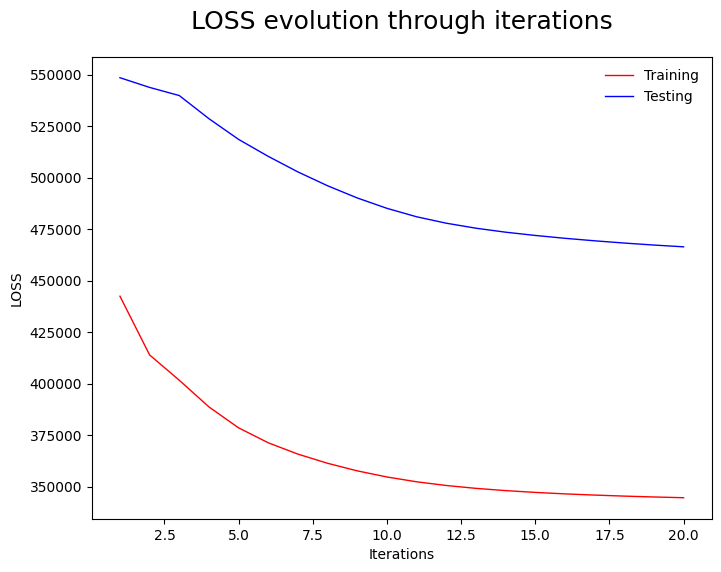

In [18]:
als_25m_data.line_plot(losses, losses_test, xaxis = "Iterations", yaxis = "LOSS", title="LOSS evolution through iterations")


## Plot RMSEs on training and test sets

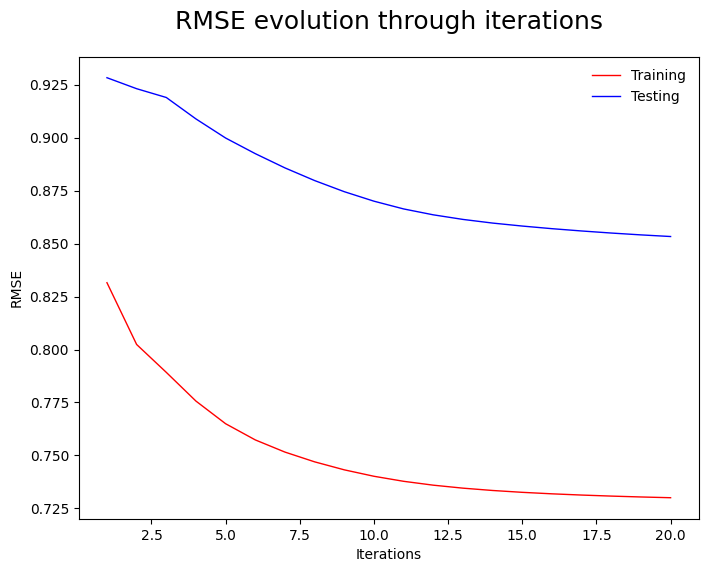

In [17]:

als_25m_data.line_plot(rmse, rmses_test, xaxis = "Iterations", yaxis = "RMSE", title="RMSE evolution through iterations")


In [19]:
import pandas as pd

In [22]:
pd.DataFrame(als_25m_data.users_latents).to_csv("users_latents.csv")

In [23]:
pd.DataFrame(als_25m_data.items_latents).to_csv("items_latents.csv")

In [26]:
user_biases.tofile('users_biases.csv', sep = ',')

In [27]:
item_biases.tofile('item_biases.csv', sep = ',')